# Customer  Churn Prediction based on Telcommunication Somalia


**Dataset Info:**
Sample Data Set containing Telcommunication customer data and showing customers left last month

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
# Machine learning Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

**Load the data file **

In [2]:
telco_customer_data = pd.read_csv('Telco-Customer-Churn.csv')

Look at the top 5 records of data

In [3]:
telco_customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
telco_customer_data.shape

(7043, 21)

In [5]:
telco_customer_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Checking the data types of all the columns

In [6]:
telco_customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Check the descriptive statistics of numeric variables

In [7]:
telco_customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Read churn variable 

In [8]:
telco_customer_data['Churn'].value_counts()

No     5173
Yes    1870
Name: Churn, dtype: int64

show churn variables as graph

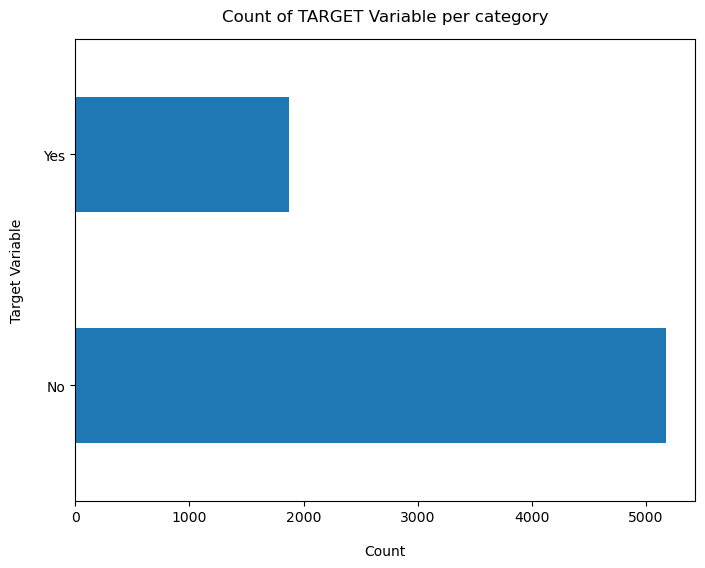

In [9]:
telco_customer_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

show churn varibales as percentage

In [10]:
100*telco_customer_data['Churn'].value_counts()/len(telco_customer_data['Churn'])

No     73.448814
Yes    26.551186
Name: Churn, dtype: float64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

Concise Summary of the dataframe, as we have too many columns.

In [11]:
telco_customer_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Check missing value 

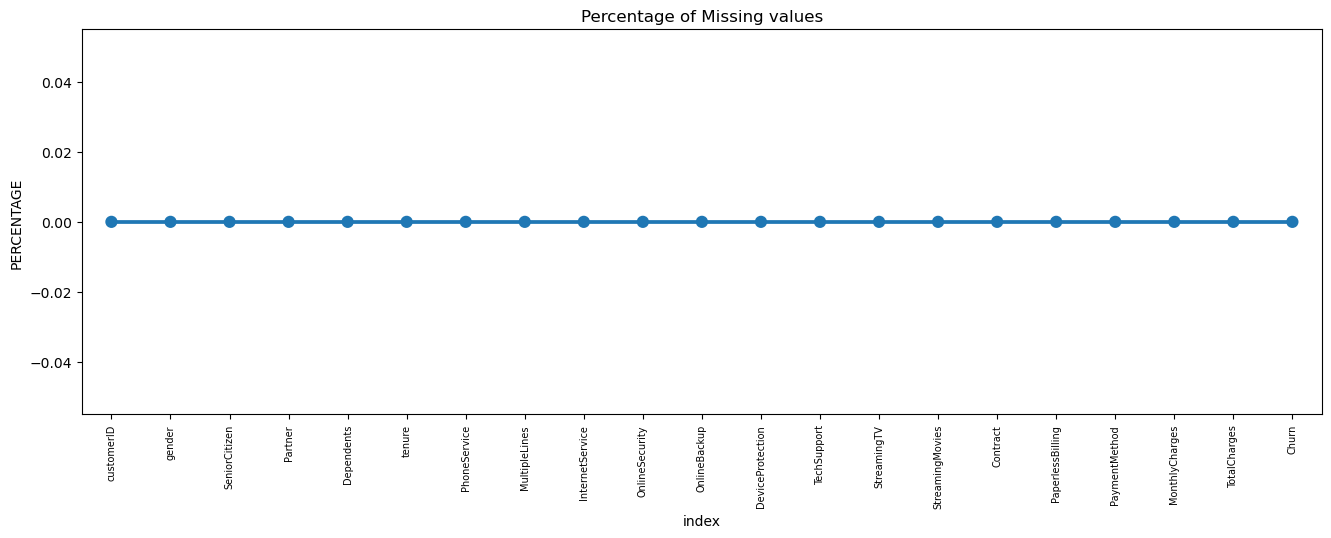

In [12]:
missing = pd.DataFrame((telco_customer_data.isnull().sum())*100/telco_customer_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [13]:
telco_data = telco_customer_data.copy()

**2.** Check duplicated data and Remove

In [14]:
duplicate_records = telco_data[telco_data.duplicated()]
duplicate_records

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**3.** Remove duplicated data 

In [15]:
telco_data.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**4.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [16]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**5.** As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [17]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**6. Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [18]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)

**7.** Check Outlier

In [23]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return telco_data[(telco_data[column] < lower_bound) | (telco_data[column] > upper_bound)].shape[0]

# Columns to check for outliers
columns_to_check = ['SeniorCitizen', 'MonthlyCharges','TotalCharges']

# Calculate the number of outliers in each column
outliers_count = {column: detect_outliers_iqr(telco_data, column) for column in columns_to_check}
outliers_count


# def detect_outliers_iqr(data):
#     outliers_list = []
#     numeric_columns = data.select_dtypes(include=['number']).columns
#     for column in numeric_columns:
#         Q1 = data[column].quantile(0.25)
#         Q3 = data[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].copy()
#         column_outliers['Outlier_Column'] = column
#         outliers_list.append(column_outliers)
#     outliers = pd.concat(outliers_list)
#     return outliers

# # Detect outliers in all numeric columns
# all_outliers = detect_outliers_iqr(telco_data)
# all_outliers

{'SeniorCitizen': 0, 'MonthlyCharges': 0, 'TotalCharges': 1}

**8.** Remove Outlier

In [24]:
# Define a function to remove outliers based on the IQR method for a given column
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(telco_data[column] >= lower_bound) & (telco_data[column] <= upper_bound)]

# Columns to check for outliers
columns_to_check = ['SeniorCitizen', 'MonthlyCharges','TotalCharges']

# Apply the outlier removal for each column individually
telco_data = telco_data.copy()
for column in columns_to_check:
    telco_data = remove_outliers_iqr(telco_data, column)

# Check the new shape of the dataset to see how many records remain
telco_data.shape

(5859, 21)

**9.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [20]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [21]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [22]:
telco_data['tenure_group'].value_counts()

1 - 12     1855
61 - 72    1162
13 - 24     856
49 - 60     685
25 - 36     674
37 - 48     639
Name: tenure_group, dtype: int64

**10.** Remove columns not required for processing

In [23]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


Save File

In [28]:
telco_data.to_excel('telco_data.xlsx', engine='openpyxl', index=False)

## Data Exploration
**1. ** Plot distibution of individual predictors by churn

### Univariate Analysis

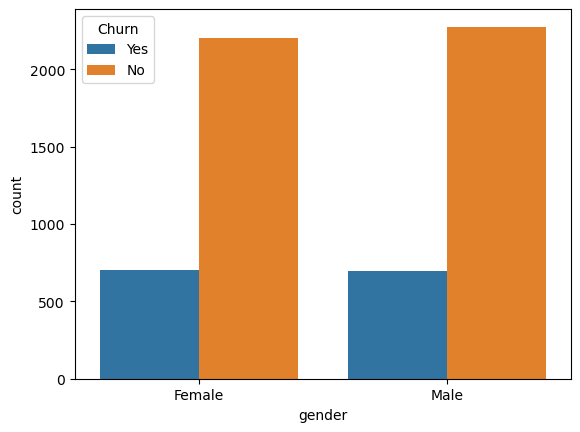

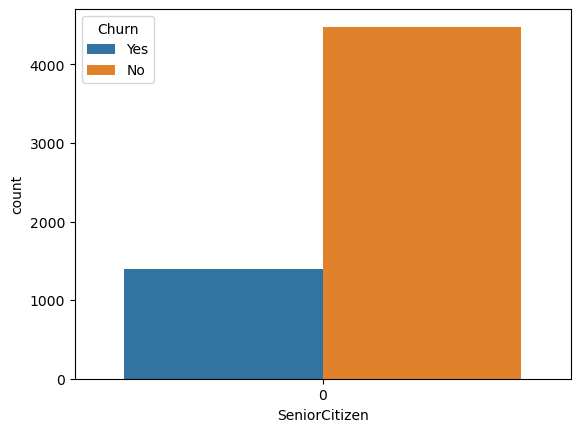

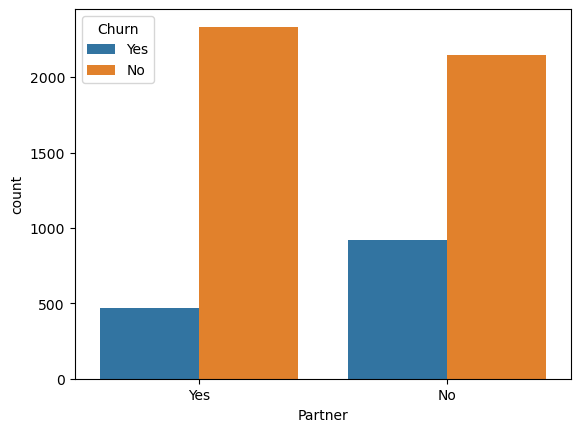

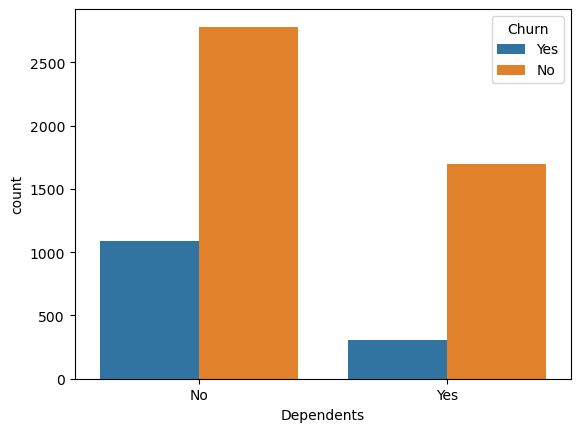

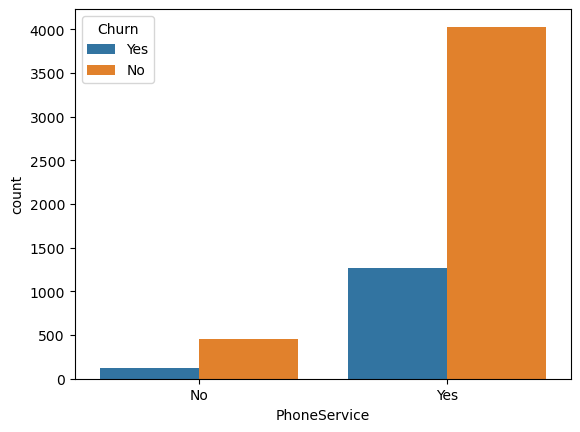

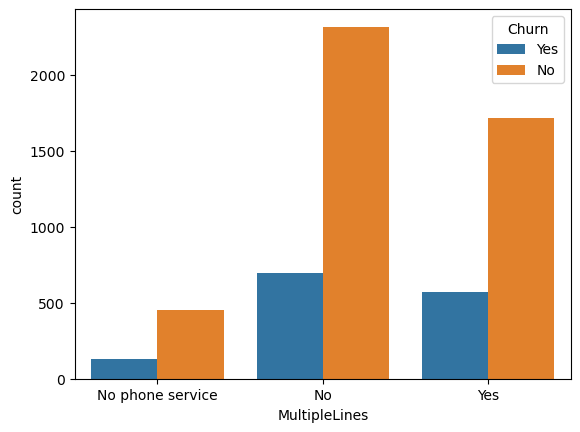

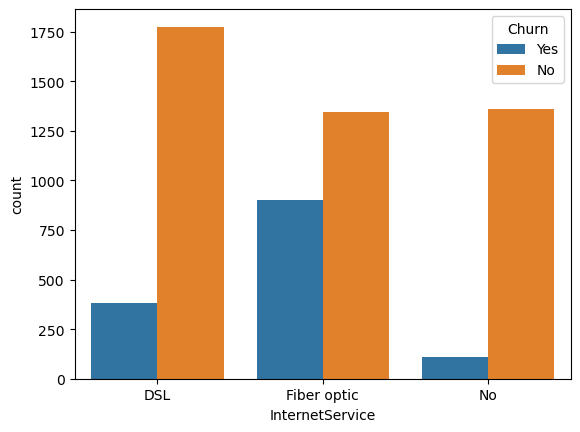

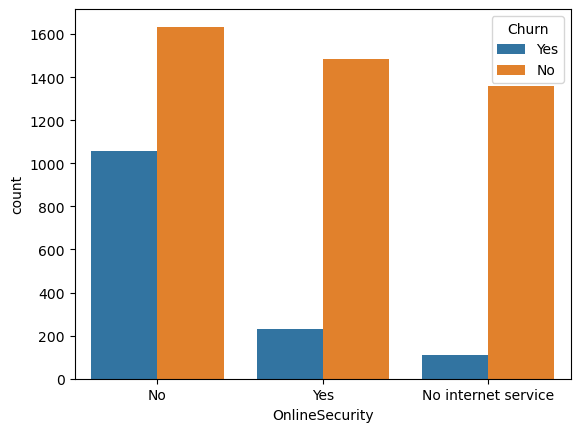

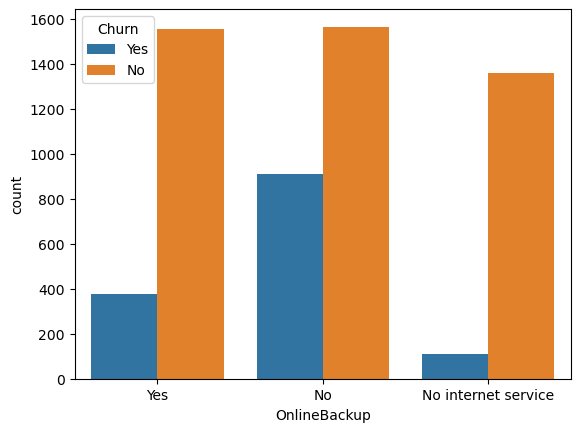

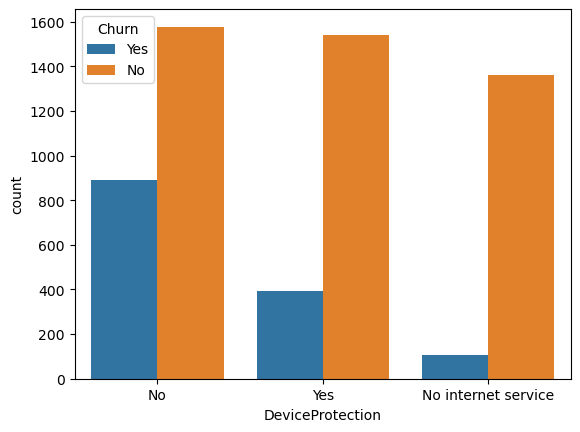

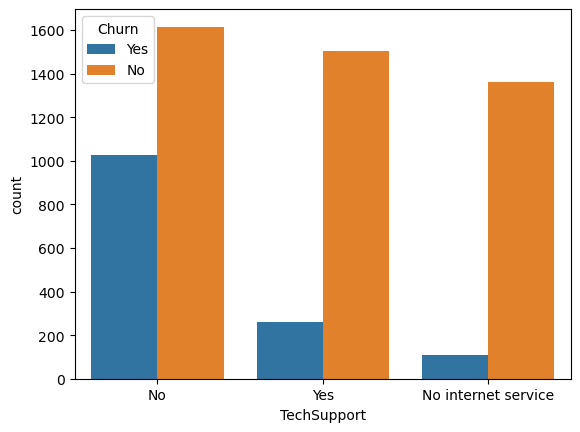

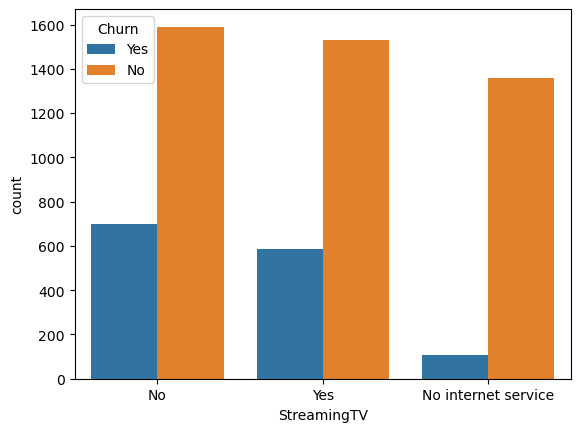

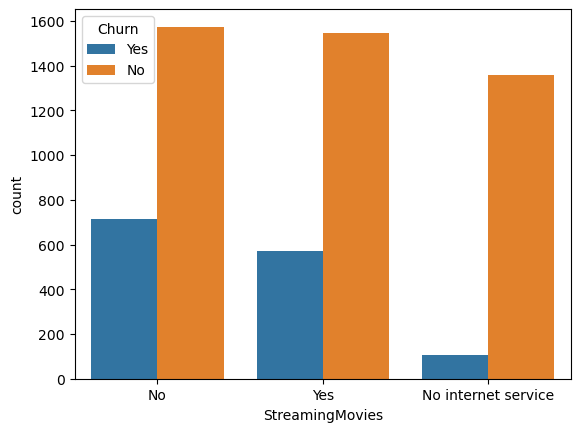

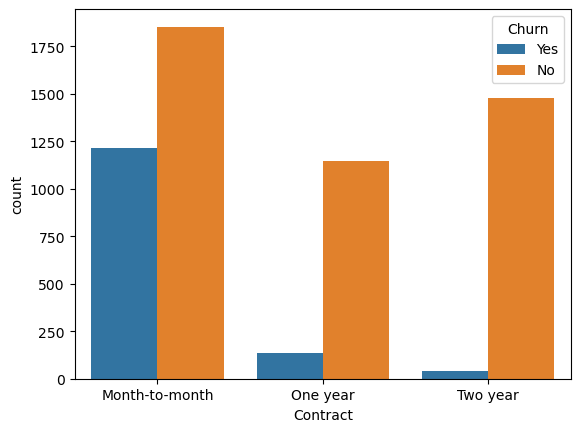

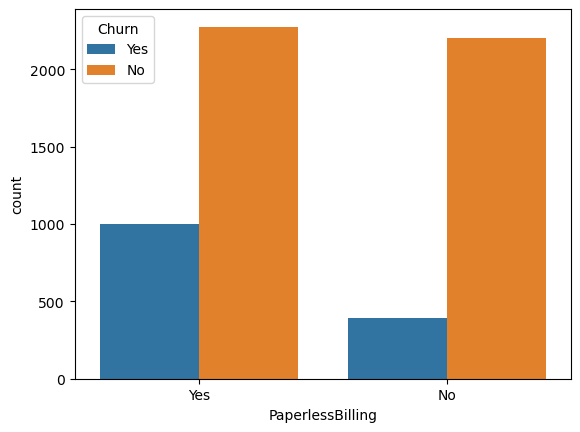

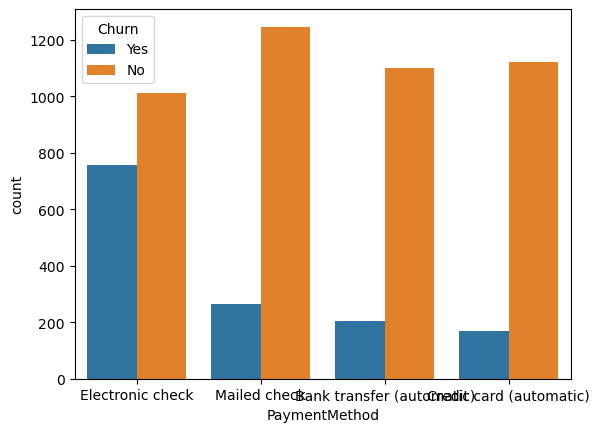

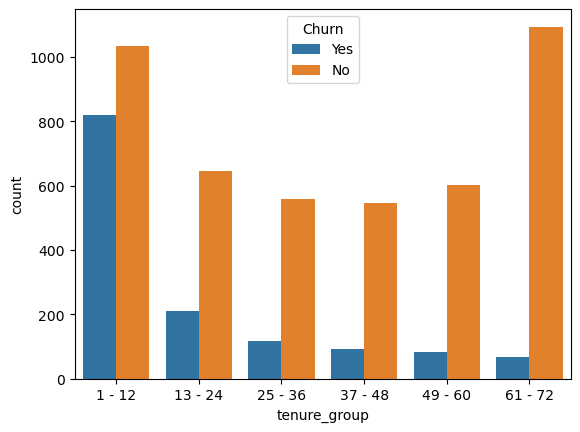

In [24]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')
    plt.savefig(f'{predictor}.png', dpi=300, bbox_inches='tight')

**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [25]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Convert all the categorical variables into dummy variables

In [26]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


**11. ** Churn by Monthly Charges and Total Charges

C:\Users\Zakar\AppData\Local\Temp\ipykernel_18236\2630431071.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
C:\Users\Zakar\AppData\Local\Temp\ipykernel_18236\2630431071.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],


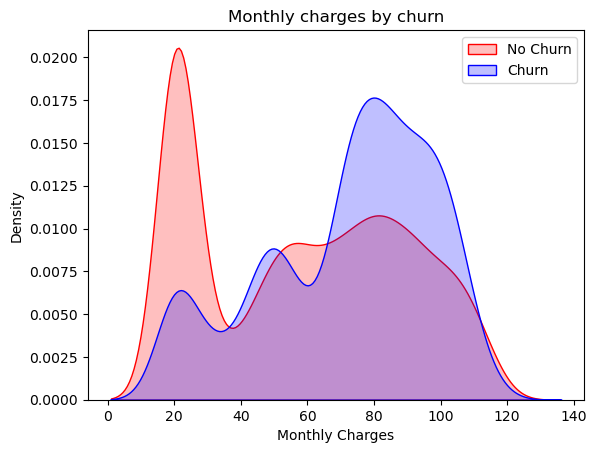

In [27]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
plt.savefig('Churn by Monthly Charges.png', dpi=300, bbox_inches='tight')

**Insight:** Churn is high when Monthly Charges ar high

C:\Users\Zakar\AppData\Local\Temp\ipykernel_18236\2602796981.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
C:\Users\Zakar\AppData\Local\Temp\ipykernel_18236\2602796981.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],


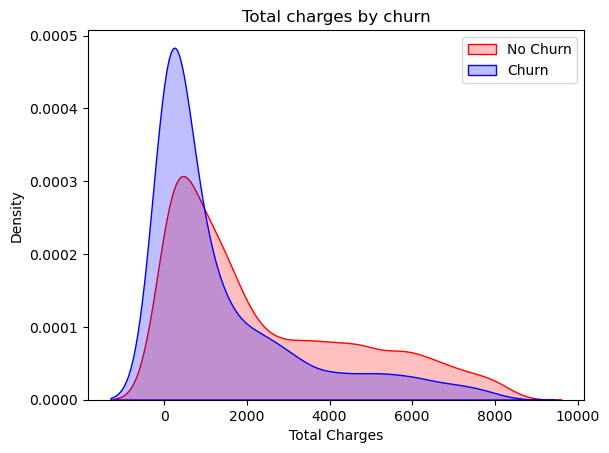

In [28]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')
plt.savefig('Churn by Total Charges.png', dpi=300, bbox_inches='tight')

**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

**12. Build a corelation of all predictors with 'Churn' **

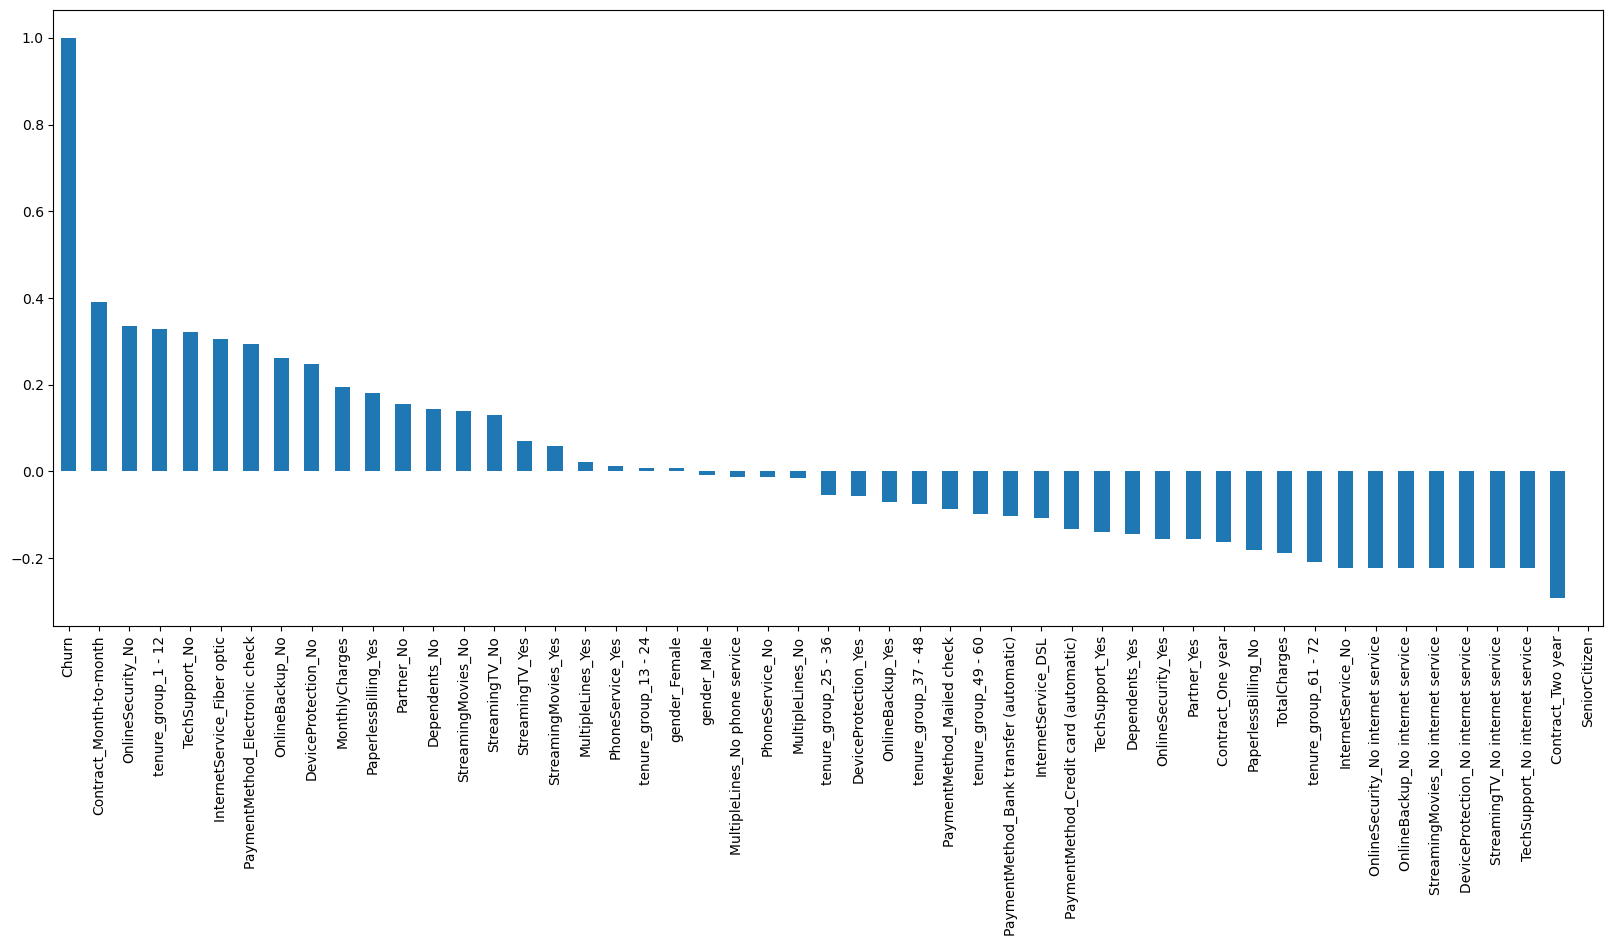

In [29]:


plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.savefig('corelation of all predictors with Churn.png', dpi=300, bbox_inches='tight')

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

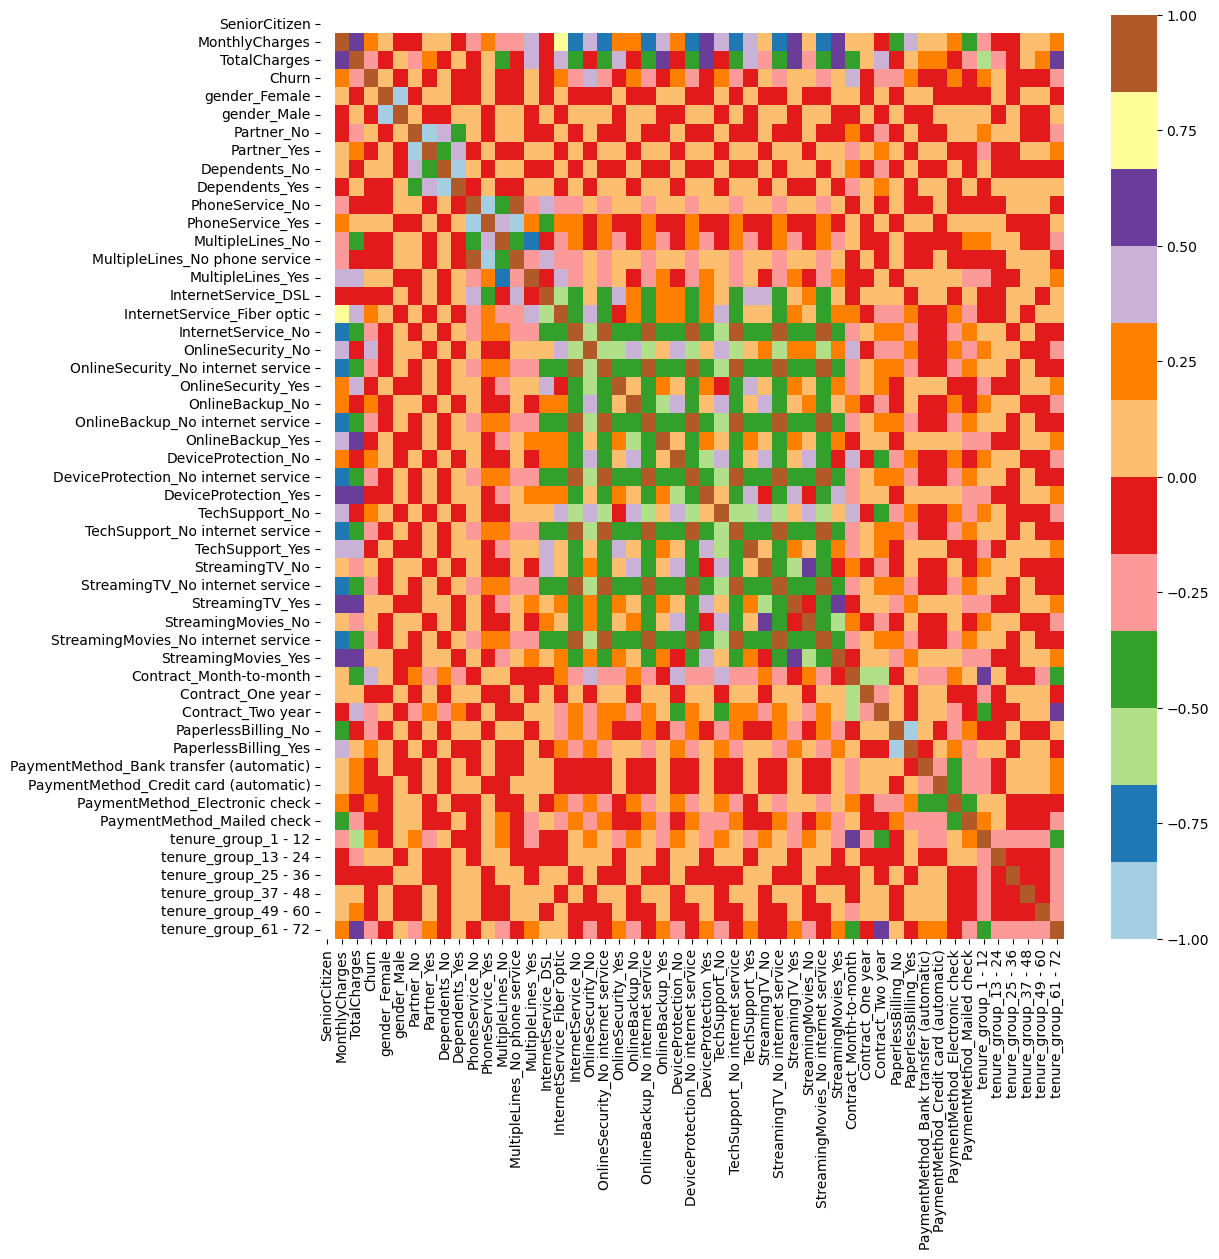

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

### Bivariate Analysis

In [31]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [32]:
def uniplot(df,col,title,plt_name,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
    plt.savefig(plt_name, dpi=300, bbox_inches='tight')    
    plt.show()

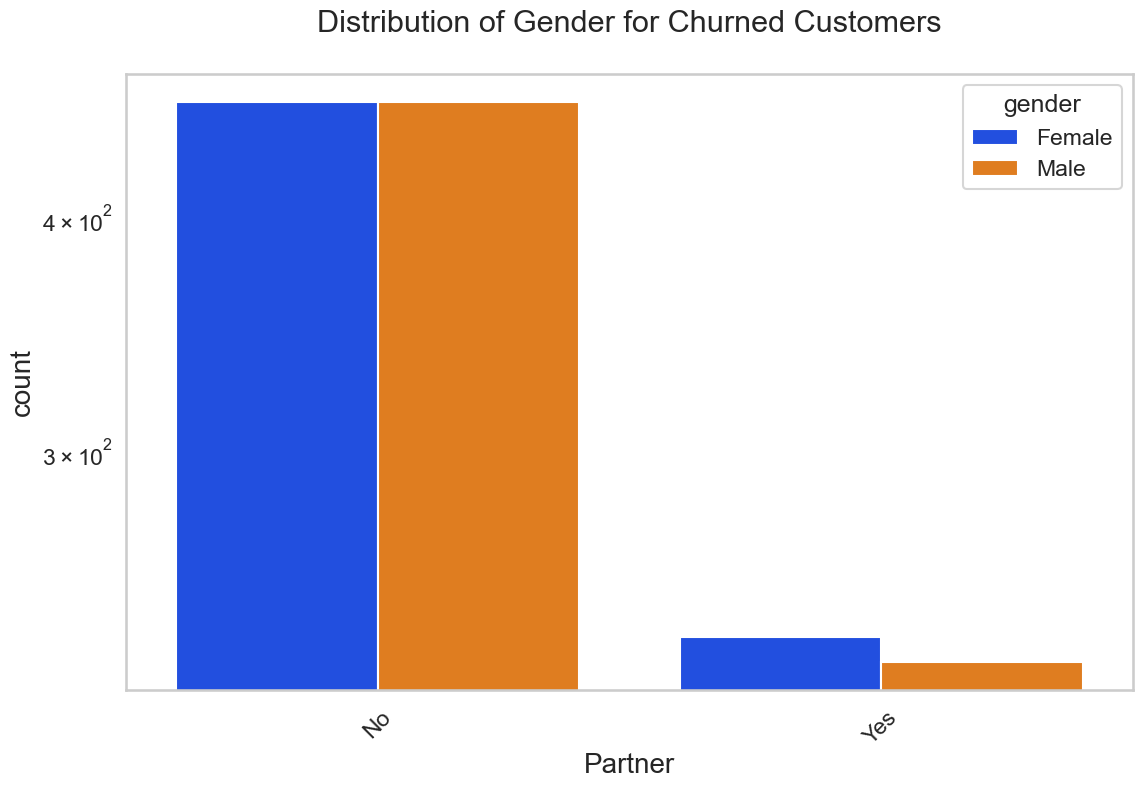

In [33]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',plt_name='Distribution of Gender for Churned Customers.png',hue='gender')

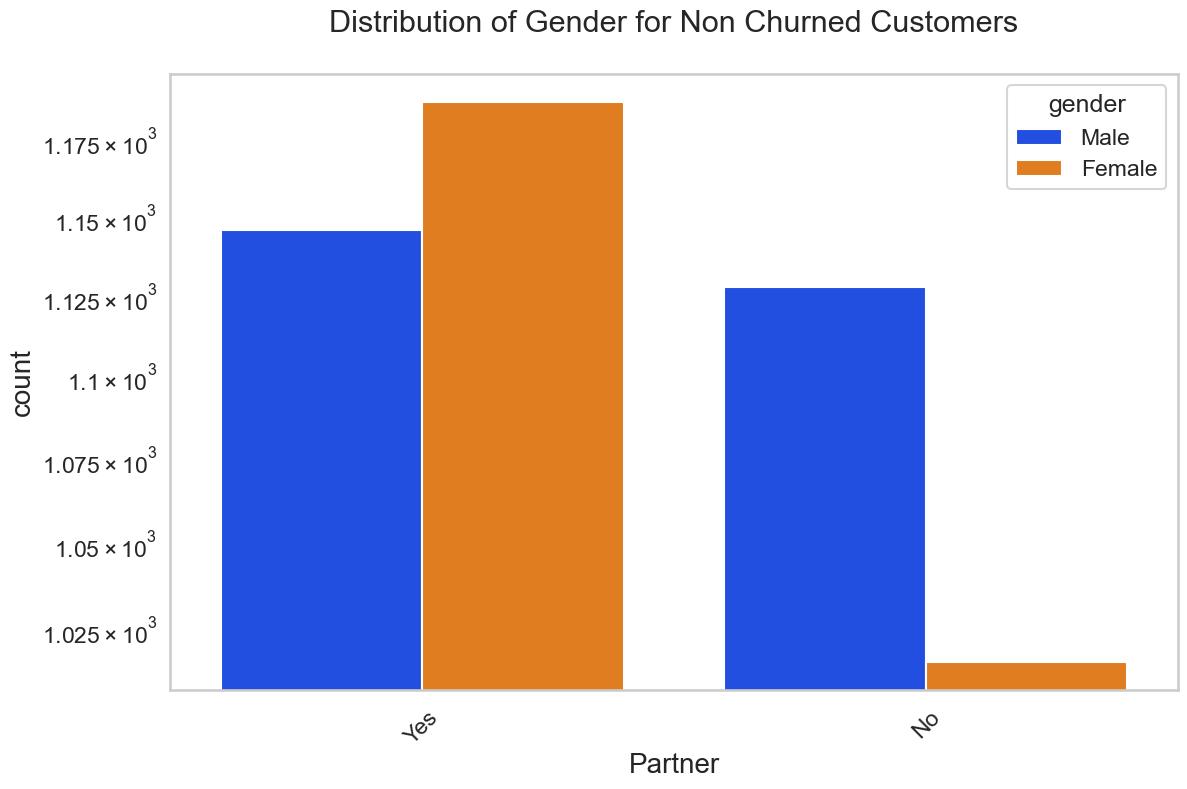

In [34]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers', plt_name='Distribution of Gender for Non Churned Customers.png',hue='gender')

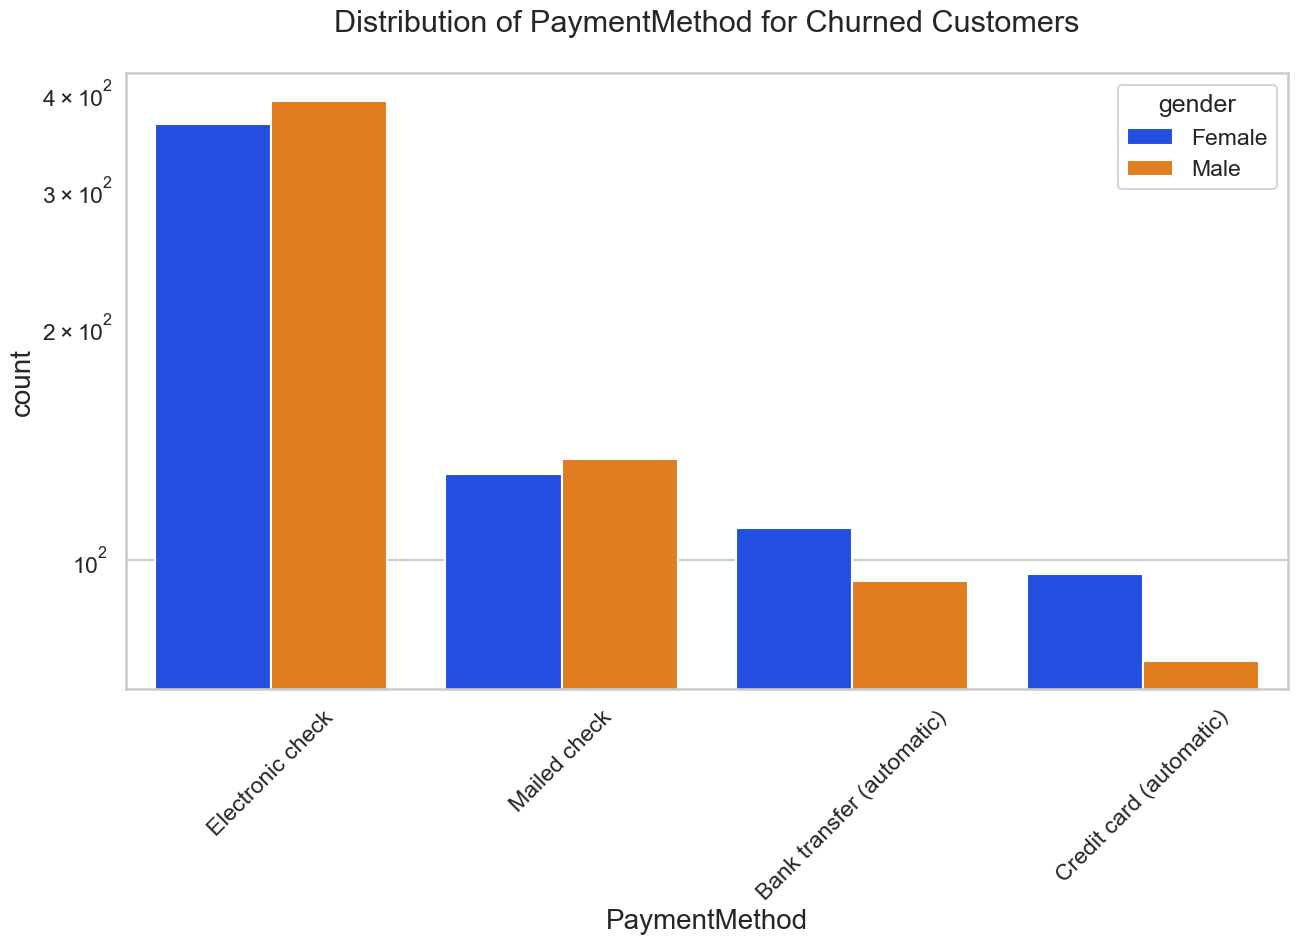

In [35]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',plt_name='Distribution of paymentMethod for Churned Customers.png',hue='gender')

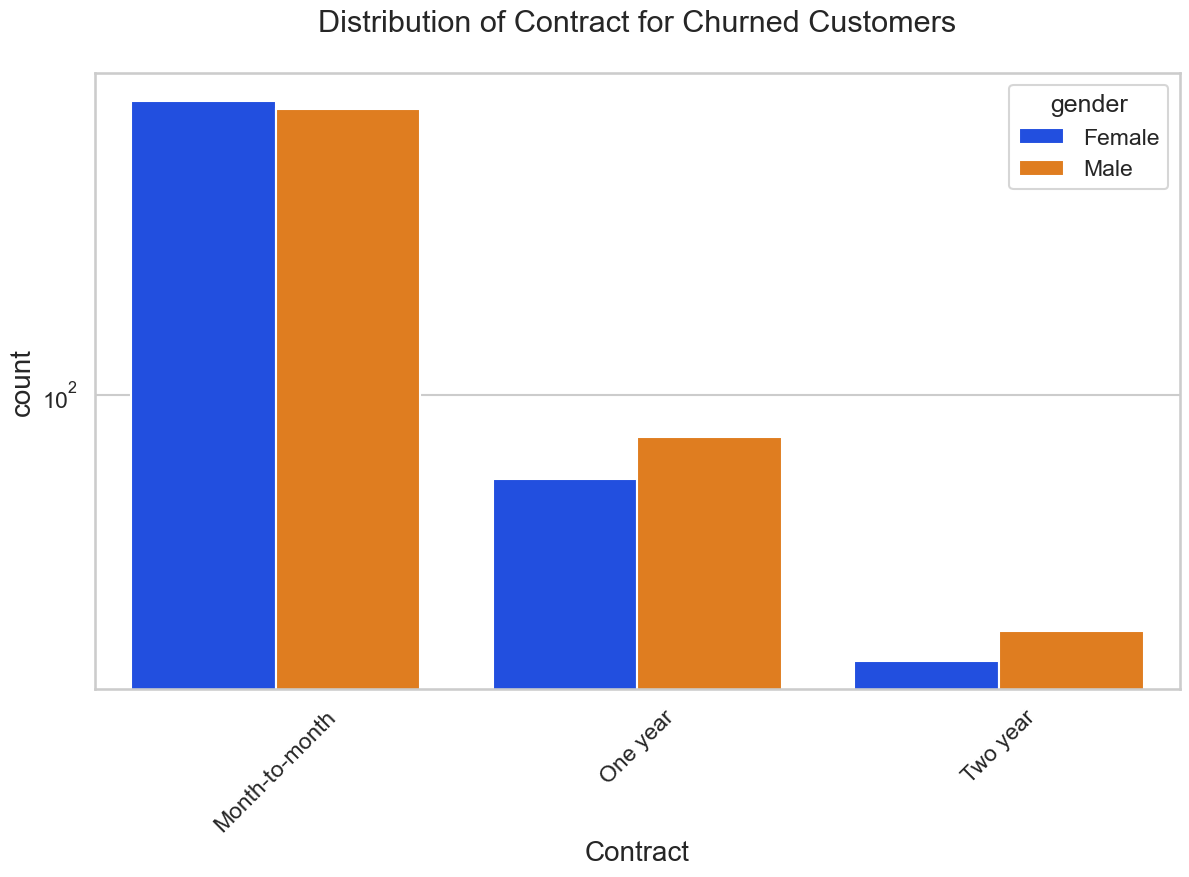

In [36]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',plt_name='Distribution of Contract for Churned Customers.png',hue='gender')

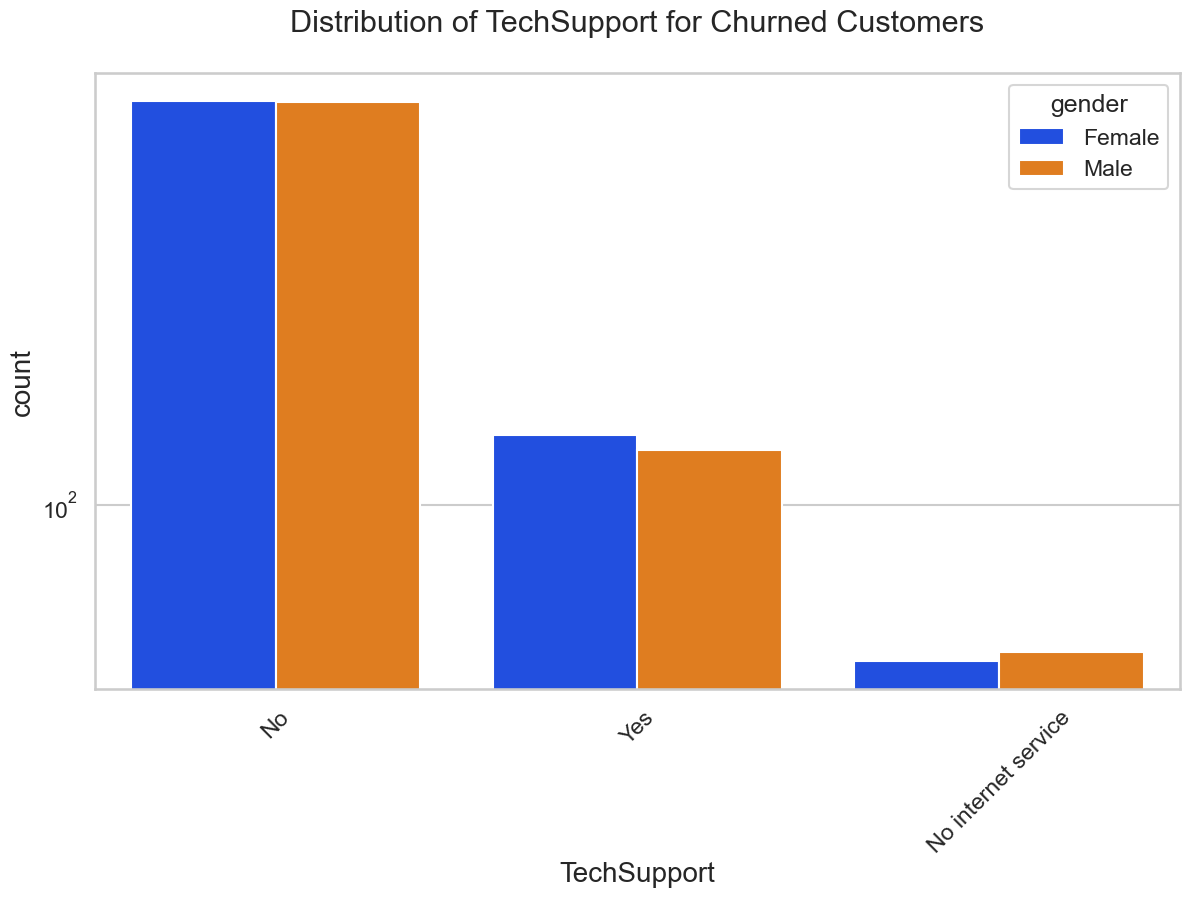

In [37]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',plt_name='Distribution of TechSupport for Churned Customers.png',hue='gender')

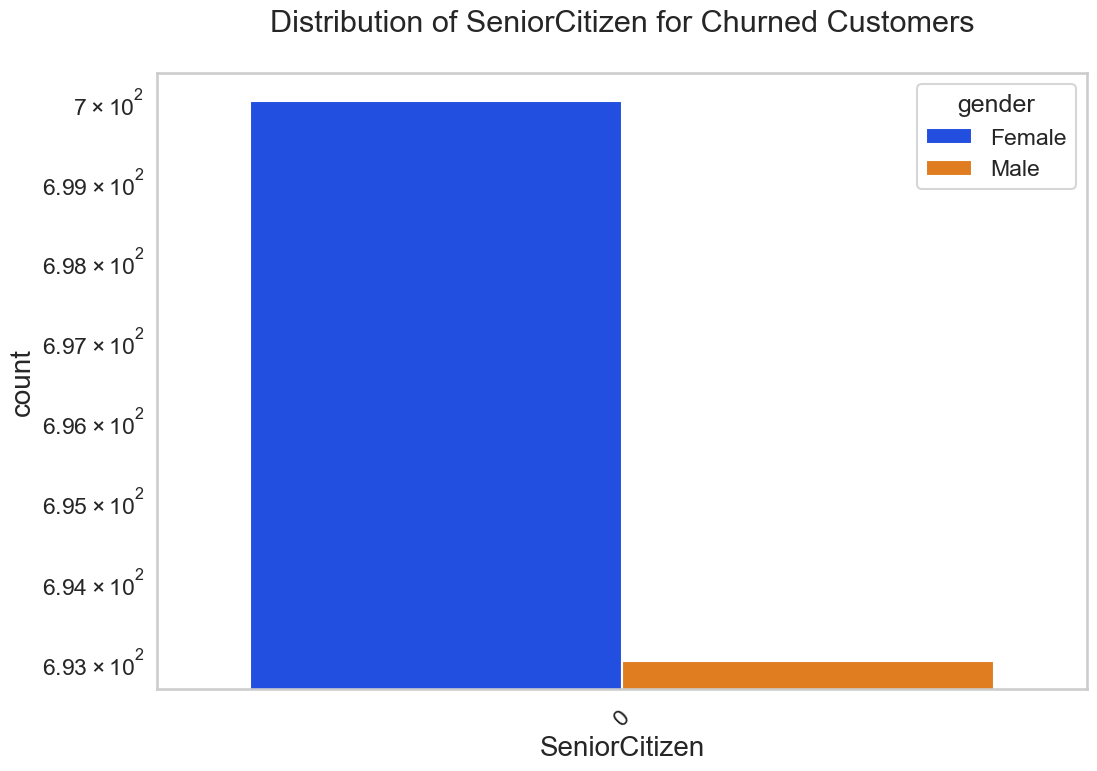

In [38]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',plt_name='Distribution of SeniorCitizen for Churned Customers.png',hue='gender')

# CONCLUSION


1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

## Model Building

Target (Dependent Variable)


In [39]:
x=telco_data_dummies.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,21.15,1419.40,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0


Features (Independent Variables)

In [40]:
y=telco_data_dummies['Churn']
y

0       1
1       0
2       1
3       0
4       1
       ..
7037    0
7038    0
7039    0
7040    0
7042    0
Name: Churn, Length: 5871, dtype: int32

##### Train Test Split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Decision Tree Classifier

In [42]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [43]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [44]:
y_pred=model_dt.predict(x_test)

In [45]:
print("Descision Tree Classifier Testing Accuracy of imbalanced dataset :", round(model_dt.score(x_test,y_test) * 100,1))
print("Descision Tree Classifier Training Accuracy of imbalanced dataset :", round(model_dt.score(x_train,y_train) * 100,1))

Descision Tree Classifier Testing Accuracy of imbalanced dataset : 80.7
Descision Tree Classifier Training Accuracy of imbalanced dataset : 82.2


In [46]:
print(confusion_matrix(y_test, y_pred))

[[792  96]
 [131 156]]


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       888
           1       0.62      0.54      0.58       287

    accuracy                           0.81      1175
   macro avg       0.74      0.72      0.73      1175
weighted avg       0.80      0.81      0.80      1175



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.



###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [48]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [49]:
xdt_train,xdt_test,ydt_train,ydt_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [50]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [51]:
model_dt_smote.fit(xdt_train,ydt_train)
ydt_predict = model_dt_smote.predict(xdt_test)

In [52]:
model_score_dt = model_dt_smote.score(xdt_test, ydt_test)
print("Descision Tree Classifier Testing Accuracy balanced dataset :", round(model_score_dt * 100,1))
model_train_score_dt = model_dt_smote.score(xdt_train, ydt_train)
print("Descision Tree Classifier Training Accuracy balanced dataset :", round(model_train_score_dt * 100,1))

Descision Tree Classifier Testing Accuracy balanced dataset : 93.2
Descision Tree Classifier Training Accuracy balanced dataset : 94.9


In [53]:
print(classification_report(ydt_test, ydt_predict))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       484
           1       0.92      0.95      0.94       568

    accuracy                           0.93      1052
   macro avg       0.93      0.93      0.93      1052
weighted avg       0.93      0.93      0.93      1052



In [54]:
print(confusion_matrix(ydt_test, ydt_predict))

[[440  44]
 [ 28 540]]


In [55]:
conf_matrix_dt = confusion_matrix(ydt_test, ydt_predict)

###### Now we can see quite better results, i.e. Accuracy: 93 %.

###### Let's try with some other classifier.

#### Random Forest Classifier

In [56]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=10, min_samples_leaf=8)

In [57]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, random_state=100)

In [58]:
y_pred=model_rf.predict(x_test)

In [59]:
print("Random Forest Classifier Testing Accuracy of imbalanced dataset :", round(model_rf.score(x_test,y_test) * 100,1))
print("Random Forest Classifier Training Accuracy of imbalanced dataset :", round(model_rf.score(x_train,y_train) * 100,1))

Random Forest Classifier Testing Accuracy of imbalanced dataset : 81.0
Random Forest Classifier Training Accuracy of imbalanced dataset : 84.3


In [60]:
print(confusion_matrix(y_test, y_pred))

[[828  60]
 [163 124]]


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       888
           1       0.67      0.43      0.53       287

    accuracy                           0.81      1175
   macro avg       0.75      0.68      0.70      1175
weighted avg       0.80      0.81      0.79      1175



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.



###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [62]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [63]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [64]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [65]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [66]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [67]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print("Random Forest Classifier Testing Accuracy balanced dataset :", round(model_score_r1 * 100,1))
model_train_score = model_rf_smote.score(xr_train1, yr_train1)
print("Random Forest Classifier Training Accuracy balanced dataset :", round(model_train_score * 100,1))

Random Forest Classifier Testing Accuracy balanced dataset : 95.4
Random Forest Classifier Training Accuracy balanced dataset : 93.8


In [68]:
print(classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       469
           1       0.95      0.97      0.96       597

    accuracy                           0.95      1066
   macro avg       0.96      0.95      0.95      1066
weighted avg       0.95      0.95      0.95      1066



In [69]:
print(confusion_matrix(yr_test1, yr_predict1))

[[437  32]
 [ 17 580]]


In [70]:
conf_matrix_rf = confusion_matrix(yr_test1, yr_predict1)

###### Now we can see quite better results, i.e. Accuracy: 93 %.

###### Let's try with some other classifier.

#### Support vector machine

In [71]:
model = SVC(kernel="rbf", gamma=0.5, C=1.0)

In [72]:
model.fit(x_train, y_train)

SVC(gamma=0.5)

In [73]:
y_pred=model.predict(x_test)

In [74]:
print("SVM Training Accuracy of imbalanced dataset :", round(model.score(x_test,y_test) * 100,1))
print("SVM Training Accuracy of imbalanced dataset :", round(model.score(x_train,y_train) * 100,1))

SVM Training Accuracy of imbalanced dataset : 76.6
SVM Training Accuracy of imbalanced dataset : 98.6


In [75]:
print(confusion_matrix(y_test, y_pred))

[[878  10]
 [265  22]]


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       888
           1       0.69      0.08      0.14       287

    accuracy                           0.77      1175
   macro avg       0.73      0.53      0.50      1175
weighted avg       0.75      0.77      0.69      1175



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.



###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [77]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [78]:
xsvm_train1,xsvm_test1,ysvm_train1,ysvm_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [79]:
model_svm_smote=SVC()

In [80]:
model_svm_smote.fit(xsvm_train1,ysvm_train1)

SVC()

In [81]:
ysvm_predict1 = model_svm_smote.predict(xsvm_test1)

In [82]:
model_score_svm1 = model_svm_smote.score(xsvm_test1, ysvm_test1)
print("SVM Testing Accuracy balanced dataset :", round(model_score_svm1 * 100,1))
model_train_score_svm1 = model_svm_smote.score(xsvm_train1, ysvm_train1)
print("SVM Training Accuracy balanced dataset :", round(model_train_score_svm1 * 100,1))

SVM Testing Accuracy balanced dataset : 76.3
SVM Training Accuracy balanced dataset : 76.5


In [83]:
print(confusion_matrix(ysvm_test1, ysvm_predict1))

[[371  97]
 [155 441]]


In [84]:
conf_matrix_svm = confusion_matrix(ysvm_test1, ysvm_predict1)

In [85]:
print(classification_report(ysvm_test1, ysvm_predict1))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       468
           1       0.82      0.74      0.78       596

    accuracy                           0.76      1064
   macro avg       0.76      0.77      0.76      1064
weighted avg       0.77      0.76      0.76      1064



###### Now we can see quite better results, i.e. Accuracy: 76 %.

###### Let's try with some other classifier.

#### LogisticRegression

In [86]:
logr = linear_model.LogisticRegression()

In [87]:
logr.fit(x_train, y_train)

C:\Users\Zakar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
ylog_pred=logr.predict(x_test)

In [89]:
print("Logistic Regression Testing Accuracy of imbalanced dataset :", round(logr.score(x_test,y_test) * 100,1))
print("Logistic Regression Training Accuracy of imbalanced dataset :", round(logr.score(x_train,y_train) * 100,1))

Logistic Regression Testing Accuracy of imbalanced dataset : 81.1
Logistic Regression Training Accuracy of imbalanced dataset : 81.8


In [90]:
print(confusion_matrix(y_test, ylog_pred))

[[830  58]
 [164 123]]


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       888
           1       0.69      0.08      0.14       287

    accuracy                           0.77      1175
   macro avg       0.73      0.53      0.50      1175
weighted avg       0.75      0.77      0.69      1175



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.



###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [92]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [93]:
xlog_train,xlog_test,ylog_train,ylog_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [94]:
model_logr_smote=linear_model.LogisticRegression()
model_logr_smote.fit(xlog_train,ylog_train)

C:\Users\Zakar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
ylog_predict = model_logr_smote.predict(xlog_test)

In [96]:
model_score_logr = model_logr_smote.score(xlog_test, ylog_test)
print("Logistic Regression Testing Accuracy balanced dataset :", round(model_score_logr * 100,1))
model_train_score_logr = model_logr_smote.score(xlog_train, ylog_train)
print("Logistic Regression Training Accuracy balanced dataset :", round(model_train_score_logr * 100,1))

Logistic Regression Testing Accuracy balanced dataset : 93.6
Logistic Regression Training Accuracy balanced dataset : 94.6


In [97]:
print(classification_report(ylog_test, ylog_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       482
           1       0.94      0.94      0.94       578

    accuracy                           0.94      1060
   macro avg       0.94      0.94      0.94      1060
weighted avg       0.94      0.94      0.94      1060



In [98]:
print(confusion_matrix(ylog_test, ylog_predict))

[[448  34]
 [ 34 544]]


In [99]:
conf_matrix_logr = confusion_matrix(ylog_test, ylog_predict)

###### Now we can see quite better results, i.e. Accuracy: 94 %.

###### Let's try with some other classifier.

**Confusion matrix**

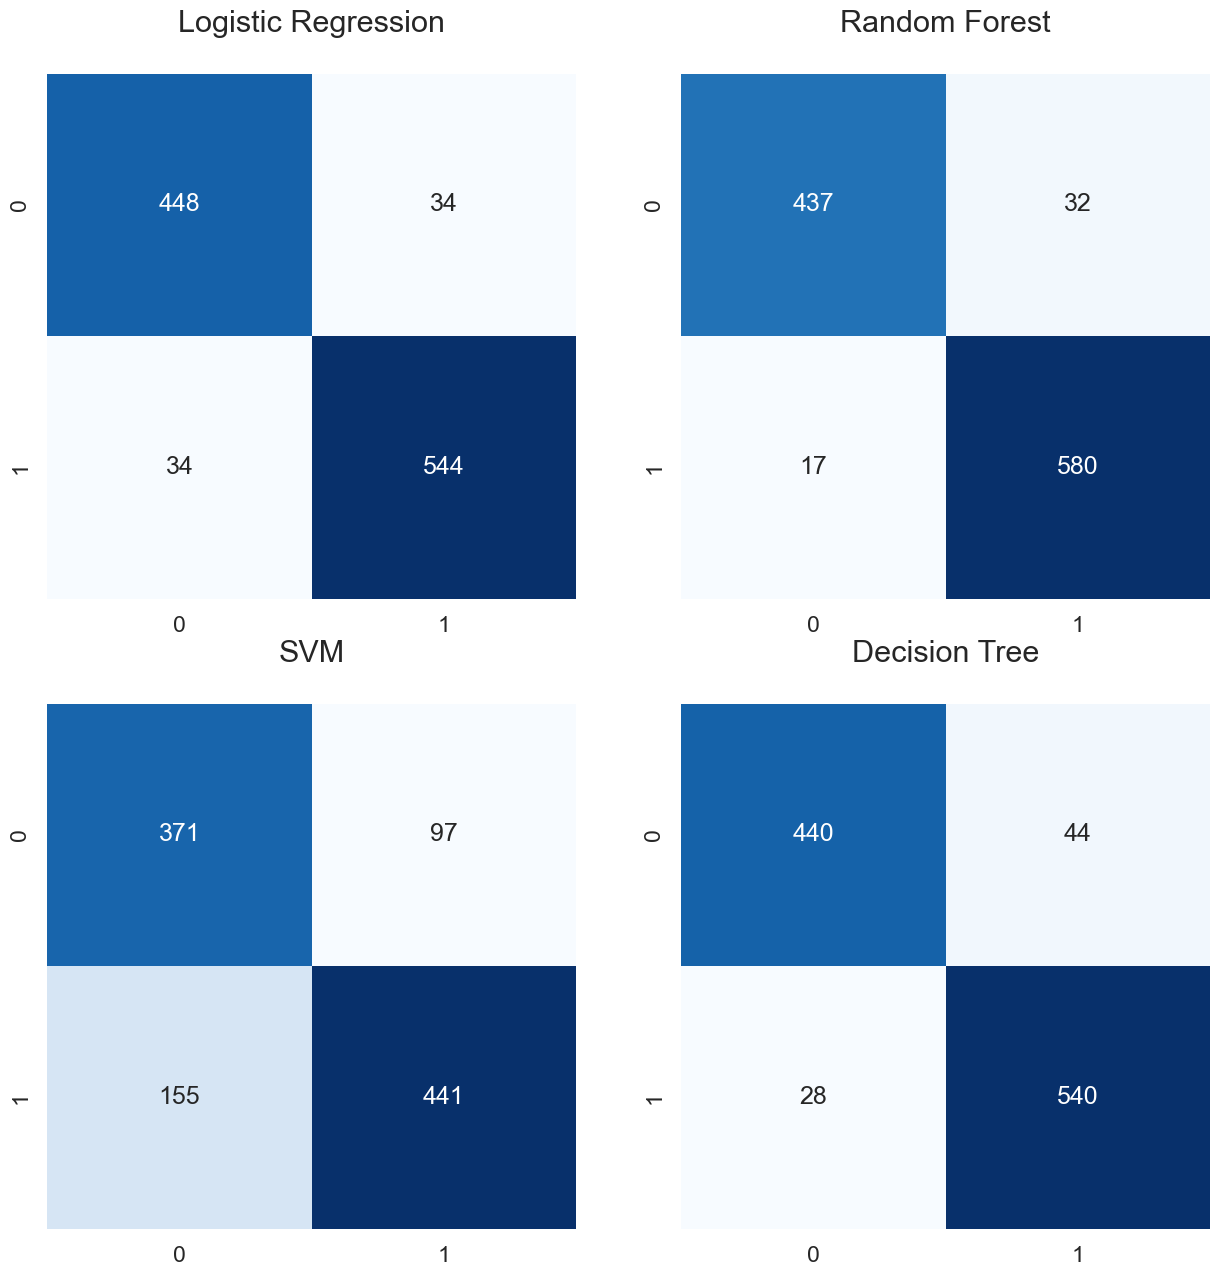

In [100]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Plot Logistic Regression Confusion Matrix
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix_logr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression')

# Plot Random Forest Confusion Matrix
plt.subplot(2, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest')

# Plot SVM Confusion Matrix
plt.subplot(2, 2, 3)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM')

# Plot Decision Tree Confusion Matrix
plt.subplot(2, 2, 4)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree')
# Save the entire figure
plt.savefig('Confusion Matrices.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

**Plotting accuracy comparison**

Accuracy scores

In [101]:
accuracy_scores = [model_score_logr, model_score_svm1, model_score_r1, model_score_dt]
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree']

Plotting accuracy comparison

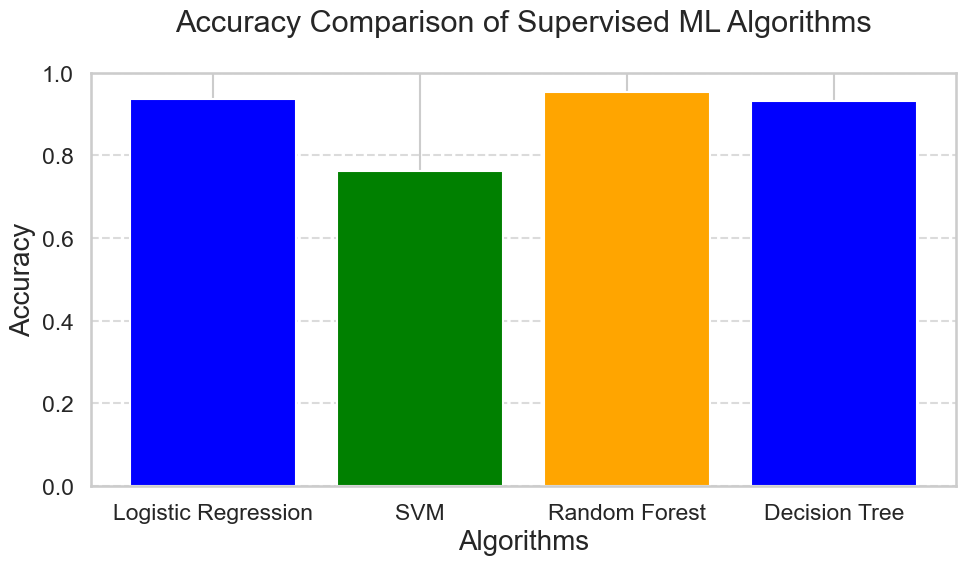

In [102]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])  
plt.title('Accuracy Comparison of Supervised ML Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Accuracy Comparison of Supervised ML Algorithms.png', dpi=300, bbox_inches='tight')
plt.show()

#### Save the model

import pickle to save model

In [103]:
import pickle

save model Decision Tree

In [104]:
filenamedt = 'modeldt.sav'

In [105]:
pickle.dump(model_dt_smote, open(filenamedt, 'wb'))

In [106]:
load_model = pickle.load(open(filenamedt, 'rb'))

In [107]:
model_score_dt = load_model.score(xdt_test, ydt_test)
model_score_dt

0.9315589353612167

##### Our final model i.e. DT Classifier with SMOTEENN, is now ready and dumped in modeldt.sav, which we will use and prepare API's so that we can access our model from UI.

save model Random Forest

In [108]:
filename_rf = 'modelrf.sav'

In [109]:
pickle.dump(model_rf_smote, open(filename_rf, 'wb'))

In [110]:
load_model = pickle.load(open(filename_rf, 'rb'))

In [111]:
model_score_rf = load_model.score(xr_test1, yr_test1)
model_score_rf

0.9540337711069419

##### Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in modelrf.sav, which we will use and prepare API's so that we can access our model from UI.

save model Support vector machine

In [112]:
filename_svm = 'modelsvm.sav'

In [113]:
pickle.dump(model_svm_smote, open(filename_svm, 'wb'))

In [114]:
load_model = pickle.load(open(filename_svm, 'rb'))

In [115]:
model_score_svm = load_model.score(xsvm_test1, ysvm_test1)
model_score_svm

0.7631578947368421

##### Our final model i.e. SVM with SMOTEENN, is now ready and dumped in modelsvm.sav, which we will use and prepare API's so that we can access our model from UI.

save model Logistic Regression

In [116]:
filename_log = 'modellog.sav'

In [117]:
pickle.dump(model_logr_smote, open(filename_log, 'wb'))

In [118]:
load_model = pickle.load(open(filename_log, 'rb'))

In [119]:
model_score_log = load_model.score(xlog_test, ylog_test)
model_score_log

0.9358490566037736

##### Our final model i.e. Logistic Regression with SMOTEENN, is now ready and dumped in modellog.sav, which we will use and prepare API's so that we can access our model from UI.